In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.shape

(8124, 23)

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
X=df.drop('class',axis=1) #Predictors
y=df['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [14]:
#encoding data
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.9294503691550451

In [21]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [22]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.8461853978671042

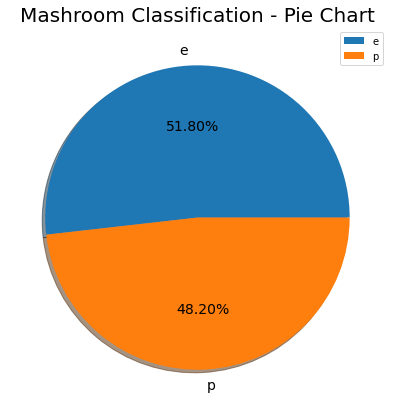

In [23]:
plt.figure(figsize=(7,7))
l=df['class'].value_counts()
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 14},autopct='%1.2f%%')
plt.legend(fontsize=10,loc="best")
plt.title("Mashroom Classification - Pie Chart",fontsize=20)
plt.show()

In [26]:
# From the above fig its visible that nearlt half of the mashrooms are poisions
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(X_train, y_train)
    ypred =  classifier.predict(X_test)
    acc = accuracy_score(y_test, ypred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

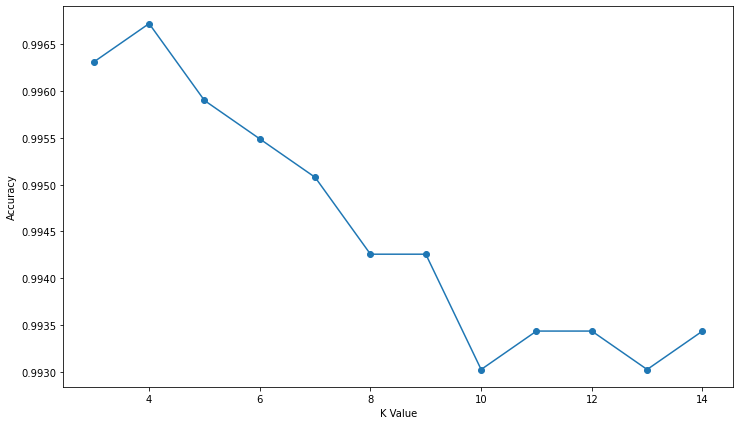

In [27]:
plt.figure(figsize=(12,7))
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric='minkowski')
classifier.fit(X_train, y_train)
ypred =  classifier.predict(X_test) 

In [31]:
print("Accuracy is : ",accuracy_score(y_pred,y_test))
print("F1 Score is : ",f1_score(y_pred,y_test, average = 'micro'))

Accuracy is :  0.8461853978671042
F1 Score is :  0.8461853978671042


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print("Accuracy is : ",accuracy_score(y_pred,y_test))
print("F1 Score is : ",f1_score(y_pred,y_test, average = 'micro'))

Accuracy is :  0.8461853978671042
F1 Score is :  0.8461853978671042


In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)

ypred = lr.predict(X_test)

In [34]:
print("Accuracy is : ",accuracy_score(y_pred,y_test))
print("F1 Score is : ",f1_score(y_pred,y_test, average = 'micro'))

Accuracy is :  0.8461853978671042
F1 Score is :  0.8461853978671042


In [35]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
ypred = dtree.predict(X_test)
print("Accuracy is : ",accuracy_score(y_pred,y_test))
print("F1 Score is : ",f1_score(y_pred,y_test, average = 'micro'))

Accuracy is :  0.8461853978671042
F1 Score is :  0.8461853978671042


In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
ypred = classifier.predict(X_test)
print("Accuracy is : ",accuracy_score(y_pred,y_test))
print("F1 Score is : ",f1_score(y_pred,y_test, average = 'micro'))

Accuracy is :  0.8461853978671042
F1 Score is :  0.8461853978671042


In [38]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
print("Accuracy is : ",accuracy_score(y_pred,y_test))
print("F1 Score is : ",f1_score(y_pred,y_test, average = 'micro'))

Accuracy is :  0.8461853978671042
F1 Score is :  0.8461853978671042


In [41]:
pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)*100

odor                        20.601444
gill-size                   11.320237
gill-color                  11.000443
population                   6.613379
stalk-root                   6.444546
spore-print-color            6.124854
stalk-surface-below-ring     5.749905
bruises                      5.281335
ring-type                    5.248128
stalk-surface-above-ring     4.691623
habitat                      3.126843
gill-spacing                 3.040478
stalk-shape                  2.430475
stalk-color-above-ring       2.114311
cap-color                    1.509149
ring-number                  1.365346
stalk-color-below-ring       1.234390
cap-surface                  1.224186
cap-shape                    0.507807
gill-attachment              0.244292
veil-color                   0.126827
veil-type                    0.000000
dtype: float64